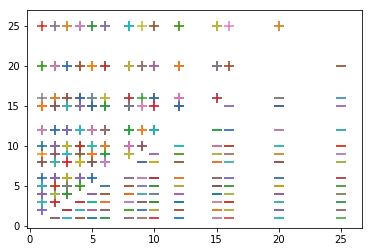

In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import csv

'''With open(‘LorR.csv’, ‘rb’) as f:
reader = csv.reader(f)
for row in reader:
    print row'''
points = np.genfromtxt('LorR.csv', delimiter = ',')

X = []
Y = []

for point in points :
    x = point[1] * point[2]
    y = point[3] * point[4]
    p = []
    if x > y :
        point[0] = -1
        plt.scatter(x, y, s=120, marker='_', linewidths=2)

    elif x < y:
        point[0] = 1
        plt.scatter(x, y, s=120, marker='+', linewidths=2)
        
    p.extend([x, y])
    X.append(p)
    Y.append(point[0])
    
#print(X)
#print(Y)

x_poi = np.array(X)
y_poi = np.array(Y)


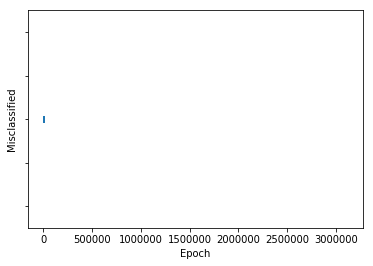

[-1026.   979.]


In [2]:
X = x_poi
Y = y_poi

w = np.zeros(len(X[0]))
eta = 1
epochs = 5000
errors = []
for epoch in range(1,epochs):
    error = 0
    for i, x in enumerate(X):
        if (Y[i]*np.dot(X[i], w)) < 1:
            w = w + eta * ( (X[i] * Y[i]) + (-2  *(1/epoch)* w) )
            error = 1
        else:
            w = w + eta * (-2  *(1/epoch)* w)
        errors.append(error)
        
    #lets plot the rate of classification errors during training for our SVM
plt.plot(errors, '|')
plt.ylim(0.5,1.5)
plt.axes().set_yticklabels([])
plt.xlabel('Epoch')
plt.ylabel('Misclassified')
plt.show()

print(w)

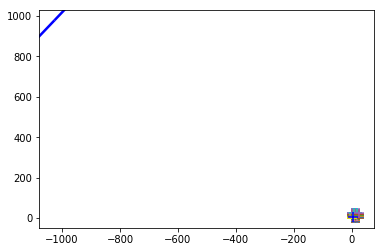

In [3]:
for d, sample in enumerate(X):
    # Plot the negative samples
    if Y[d] < -1:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    # Plot the positive samples
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)

# Add our test samples
plt.scatter(2,2, s=120, marker='_', linewidths=2, color='yellow')
plt.scatter(4,3, s=120, marker='+', linewidths=2, color='blue')

# Print the hyperplane calculated by svm_sgd()
x2=[w[0],w[1],-w[1],w[0]]
x3=[w[0],w[1],w[1],-w[0]]

x2x3 =np.array([x2,x3])
X,Y,U,V = zip(*x2x3)
ax = plt.gca()
ax.quiver(X,Y,U,V,scale=1, color='blue')